In [1]:
#Myan Sudharsanan, Jeremy Staiva, Reedham Kalariya
#Final Project Implementation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [5]:
df = pd.read_csv('./winequality-red.csv', sep=';')


df=df.drop(columns=['pH','sulphates','density'])

scaler = StandardScaler()

#df=pd.DataFrame(scaler.fit_transform(df))



df

#how many instances within quality 5 or quality 6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,9.4,5
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,10.2,5


In [7]:
X = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

clf_space = dict()

clf_space['n_estimators'] = [100, 150, 200, 250]

clf_space['criterion'] = ['gini', 'entropy', 'log_loss']

clf_space['max_depth'] = [9, 10, 11, 12, 13, 14, 15]

clf_space['max_features'] = ['sqrt', 'log2', None]

clf_space['class_weight'] = ['balanced', 'balanced_subsample']

#pca = PCA(n_components=3)

#X_reduced = pca.fit_transform(X)

#feature_importances = pca.components_.T
#important_features = np.argsort(np.abs(feature_importances), axis=0)[-2:]
#important_features = important_features[::-1]

#X_new = X[:, important_features.ravel()[:][1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train and evaluate your model


In [6]:
clf = RandomForestClassifier()

# pipeline = Pipeline([
#     ('scaler', scaler),
#     ('classifier', clf)
# ])
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("rf",RandomForestClassifier())])

param_grid = {
#     'rf__max_depth': [4, 5, 10],
#     'rf__max_features': [2, 3],
    'rf__min_samples_leaf': [3, 4, 5],
#     'rf__n_estimators': [100, 200, 300]
    
    
    'rf__n_estimators' : [100, 150, 200, 250],

    'rf__criterion' : ['gini', 'entropy', 'log_loss'],

    'rf__max_depth' : [9, 10, 11, 12, 13, 14, 15],

    'rf__max_features' : ['sqrt', 'log2', None],

    'rf__class_weight' : ['balanced', 'balanced_subsample']
}


search = GridSearchCV(pipeline, param_grid,cv=5)

# search.fit(X_train, y_train)

In [5]:
result = search.fit(X_train, y_train)
#clf.score(X_test, y_test)

KeyboardInterrupt: 

In [ ]:
# Plots for Random Forest

# Extract the scores and hyperparameters
scores = search.cv_results_['mean_test_score']
params = search.cv_results_['params']

# Plot the scores for each hyperparameter combination
n_params = len(params)
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(n_params)
width = 0.35

rects1 = ax.bar(x - width/2, scores, width)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Hyperparameter tuning results')
ax.set_xticks(x)
ax.set_xticklabels(params, rotation=90)

plt.tight_layout()
plt.show()

In [8]:
# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
# pca = PCA()
# set the tolerance to a large value to make the example faster
# logistic = LogisticRegression(max_iter=10000, tol=0.1)
# pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

NameError: name 'pipe' is not defined

In [27]:
accuracy_score(y_test, search.predict(X_test.reshape(-1,1)))

ValueError: X has 1 features, but StandardScaler is expecting 8 features as input.

In [9]:
pipeline = Pipeline([("scaler" , StandardScaler()),
                     ("knn",KNeighborsClassifier())])

knn_param_grid = {
    'knn__n_neighbors' : [4,5,6,7,8,9],
    'knn__weights' : ['uniform','distance'],
    'knn__algorithm' : ['auto','ball_tree','kd_tree','brute']
}

search = GridSearchCV(pipeline, knn_param_grid,cv=5)


In [10]:
results = search.fit(X_train, y_train)

In [22]:
accuracy_score(y_test, results.predict(X_test))

0.6208333333333333

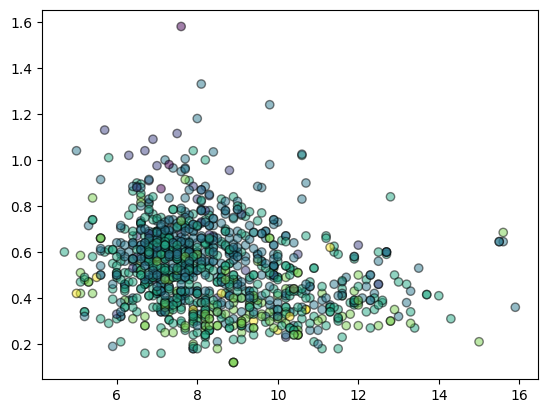

In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, alpha = 0.5, edgecolor = 'k')

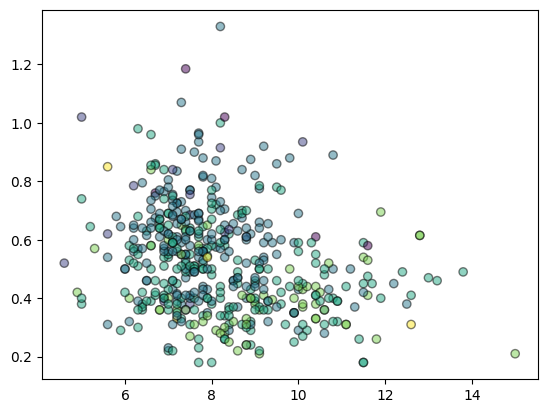

In [19]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, alpha = 0.5, edgecolor = 'k')

In [28]:
results.cv_results_

{'mean_fit_time': array([0.00229397, 0.00021572, 0.00480709, 0.00183325, 0.        ,
        0.00336637, 0.00334048, 0.00021029, 0.00044069, 0.00162277,
        0.00253096, 0.00161715, 0.        , 0.00161214, 0.        ,
        0.00029435, 0.00319929, 0.00347528, 0.        , 0.00152044,
        0.00511966, 0.00161223, 0.00159187, 0.00160761, 0.00161934,
        0.00162201, 0.        , 0.00322666, 0.        , 0.00162129,
        0.00319972, 0.00319934, 0.00021019, 0.0015883 , 0.        ,
        0.00345883, 0.00159922, 0.00159101, 0.00160007, 0.00494232,
        0.00180535, 0.00155416, 0.        , 0.00358443, 0.        ,
        0.        , 0.        , 0.00360312]),
 'std_fit_time': array([0.00298192, 0.00043144, 0.00447719, 0.00316718, 0.        ,
        0.00413481, 0.00409571, 0.00042057, 0.00088139, 0.00324554,
        0.00327398, 0.00323429, 0.        , 0.00322428, 0.        ,
        0.0005887 , 0.00391842, 0.00427813, 0.        , 0.00304089,
        0.00359862, 0.00322447, 0.003

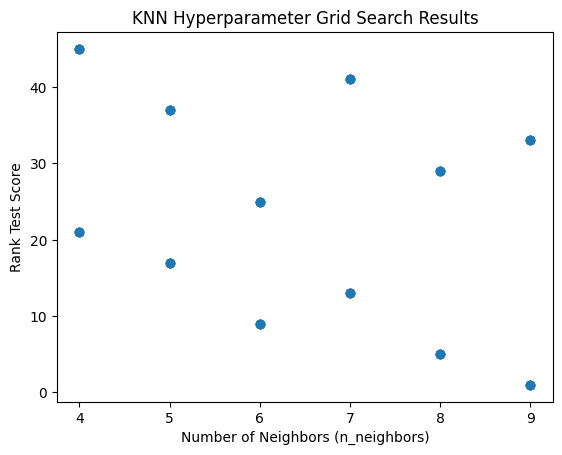

In [34]:
results = search.cv_results_

# Extract the values of n_neighbors and rank_test_score from the results
n_neighbors = [params['knn__n_neighbors'] for params in results['params']]
rank_test_score = results['rank_test_score']

# Create a scatter plot of rank_test_score vs n_neighbors
plt.scatter(n_neighbors, rank_test_score)

# Add labels to the plot
plt.title("KNN Hyperparameter Grid Search Results")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Rank Test Score")

# Show the plot
plt.show()

C:\Users\j.j.stiava\AppData\Local\Temp\ipykernel_10832\830464429.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


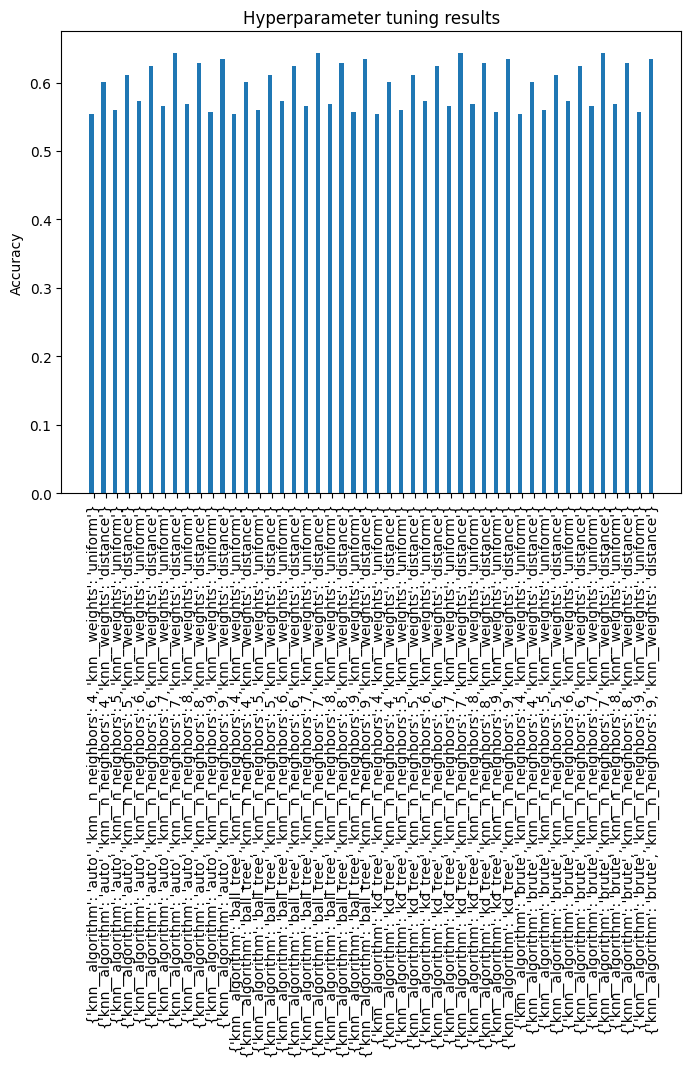

In [22]:
# Extract the scores and hyperparameters
scores = search.cv_results_['mean_test_score']
params = search.cv_results_['params']

# Plot the scores for each hyperparameter combination
n_params = len(params)
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(n_params)
width = 0.35

rects1 = ax.bar(x - width/2, scores, width)

# Add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_title('Hyperparameter tuning results')
ax.set_xticks(x)
ax.set_xticklabels(params, rotation=90)

plt.tight_layout()
plt.show()

In [23]:
accuracy_score(y_test, search.predict(X_test))

0.66875

In [48]:
scores=[]

#standardize

layers=list(range(5,300, 5))

for i in layers:
    

    mlp=MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=(i,), alpha=1e-2, max_iter = 400, learning_rate_init = 0.1).fit(X, y)
    
    y_pred=mlp.predict(X_test)
    scores.append(mlp.score(X_test, y_test))
    #scores.append(mean_squared_error(y_pred, y_test))


In [49]:
layers[scores.index(max(scores))]

295

In [50]:
max(scores)

0.5354166666666667